## Exercise 2: Reddit Data

The file askscience_data.csv is a collection of posts from the subreddit r/askscience. The task comes with two parts:

- Determine the attributes of a successful post on r/askscience
- Build a model that can predict the score of a post on r/askscience given at least the title and body of the post (There is no need to limit it to just the title and body, but you must explain why you chose the features you did).

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
pd.set_option('display.max_colwidth', None)  # or use a large number instead of None for a specific width


In [2]:
data = pd.read_csv('askscience_data.csv')

In [3]:
data.shape

(4205, 9)

In [4]:
data.head(2)

,Unnamed: 0,title,body,tag,datetime,author,score,upvote_ratio,url
0,0,Post viral cough: why does it get worse after you get better?,"Tl;dr: why is your cough during an upper respiratory infection not as bad as your post viral cough? (In the absence of asthma or secondary infection)\n\nHey folks! This question is perplexing me and I can’t seem to find a specific answer via google.\n\nI think I understand why post viral cough happens in the first place: Your mucosa are already inflamed from the infection and immune response. Your cough reflex is hypersensitive because it kicked into gear to fight the virus. As such, the smallest irritations (such as post nasal drip or cold air) are far more likely to trigger a cough. This takes a while to calm down. \n\nWhat I don’t understand is the severity and duration. Post viral coughs can take way longer to clear than the virus or any other symptoms. And people often complain of their post viral cough being more frequent, dry, painful and disruptive than when they were sick.\n\nThis has been my experience at least. Sometimes I have a cold and barely cough at all. Then as soon as my nose clears up, coughing fits keep me awake at night for 2 weeks. (And I have no comorbidities or secondary infections.) \n\nSo what’s going on there? Is there like an inflammation cycle? Are my observations totally off?\n\n— \nEDIT: Thanks so much for these responses! I want to clarify for people requesting/dispensing medical advice: please don’t! It’s against the rules of the sub. My question is *only* about the irritating unpleasant cough that 1) happens after mild illness 2) your doctor tells you not to worry about and 3) goes away on its own.",Human Body,2022-12-09 02:52:07,CarboniferousCreek,1343.0,0.93,https://www.reddit.com/r/askscience/comments/zgu1hn/post_viral_cough_why_does_it_get_worse_after_you/
1,1,Can an x-ray of an adult show chronic malnourishment in childhood?,"If a person was chronically undernourished throughout childhood, but became food secure at age 18, are there markers in their bones that would show up on x-ray that shows the history of malnourishment? How long would the markers be visible?",Human Body,2022-12-08 18:28:51,Foxs-In-A-Trenchcoat,426.0,0.91,https://www.reddit.com/r/askscience/comments/zgk9bh/can_an_xray_of_an_adult_show_chronic/


### limit to r/askscience

In [5]:
df_rsc = data[data['url'].str.contains('r/askscience')]
df_rsc.shape

(4204, 9)

### check na

In [6]:
df_rsc.isna().sum()

Unnamed: 0         0
title              0
body            1712
tag              194
datetime           0
author             0
score              0
upvote_ratio       0
url                0
dtype: int64

In [7]:
df_rsc[df_rsc['body'].isna()]['url'][:1]

4    https://www.reddit.com/r/askscience/comments/zgs42j/are_there_cells_in_humans_or_other_mammals_that/
Name: url, dtype: object

In [8]:
# df_rsc[df_rsc['tag'].isna()]

### look at range of columns

In [9]:
df_rsc.describe()

,Unnamed: 0,score,upvote_ratio
count,4204.000000,4204.000000,4204.00000
mean,1404.529971,3728.593007,0.76568
std,815.416091,5576.940099,0.17754
min,0.000000,0.000000,0.17000
25%,676.750000,4.000000,0.59000
50%,1491.500000,35.000000,0.84000
75%,2136.000000,7472.000000,0.92000
max,2735.000000,83382.000000,1.00000


In [10]:
df_rsc['tag'].nunique()

32

In [11]:
df_rsc['datetime'].min(),df_rsc['datetime'].max()

('2010-10-29 12:18:12', '2022-12-09 13:06:01')

### Plot the yearly frequency

/var/folders/qb/z424kqr56fn722trbg0x8czm0000gn/T/ipykernel_6602/954702139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rsc['datetime'] = pd.to_datetime(df_rsc['datetime'])


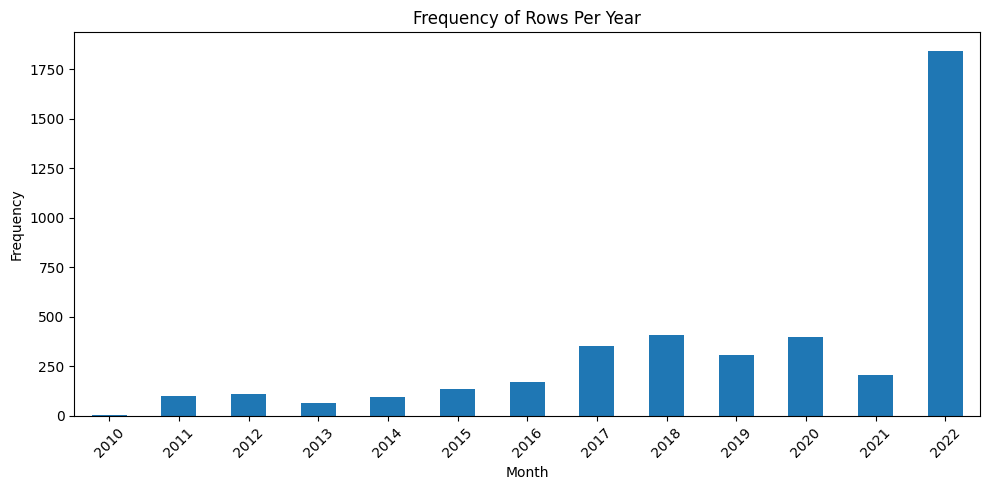

In [85]:
df_rsc['datetime'] = pd.to_datetime(df_rsc['datetime'])
df_resampled = df_rsc.copy()
df_resampled.set_index('datetime', inplace=True)
monthly_counts = df_resampled.resample('Y').size()
monthly_counts.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Rows Per Year')
plt.gca().set_xticklabels([x.strftime('%Y') for x in monthly_counts.index], rotation=45)
plt.tight_layout()
plt.show()

In [13]:
df_rsc['author'].nunique()

3314

In [14]:
df_rsc.groupby('author').count().reset_index().sort_values(by='Unnamed: 0', ascending = False).iloc[:10]

,author,Unnamed: 0,title,body,tag,datetime,score,upvote_ratio,url
404,DELETED,246,246,139,208,246,246,246,246
154,AskScienceModerator,46,46,46,46,46,46,46,46
2446,inquilinekea,12,12,8,12,12,12,12,12
1681,Toorelad,6,6,1,6,6,6,6,6
1206,PHealthy,6,6,0,6,6,6,6,6
656,Gargatua13013,6,6,4,6,6,6,6,6
1078,Most-Ant2788,5,5,0,5,5,5,5,5
1353,RichardsonM24,5,5,3,5,5,5,5,5
948,Lichewitz,5,5,1,5,5,5,5,5
153,AsAChemicalEngineer,5,5,4,2,5,5,5,5


In [15]:
# df_rsc[df_rsc['author'] == 'DELETED']

### duplicates

In [16]:
df_rsc.duplicated().sum()

0

### Look at duplicates by columns: body and title

In [17]:
# Mark all duplicates
duplicates = df_rsc[df_rsc.duplicated(subset=['body', 'title'], keep=False)]

# Sort the DataFrame based on 'body' and 'title' so duplicates are grouped together
duplicates_sorted = duplicates.sort_values(by=['body', 'title'])

# Display the sorted duplicates
duplicates_sorted


,Unnamed: 0,title,body,tag,datetime,author,score,upvote_ratio,url
612,612,A 5 foot section of railroad rail does not seem very flexible but a 200 foot section appears to be as flexible as a noodle with bends under a foot. How does longer length make it more flexible?,NaN,Engineering,2017-12-17 20:49:16,inkseep1,8057.0,0.85,https://www.reddit.com/r/askscience/comments/7kj1br/a_5_foot_section_of_railroad_rail_does_not_seem/
3038,556,A 5 foot section of railroad rail does not seem very flexible but a 200 foot section appears to be as flexible as a noodle with bends under a foot. How does longer length make it more flexible?,NaN,Engineering,2017-12-17 20:49:16,inkseep1,8055.0,0.85,https://www.reddit.com/r/askscience/comments/7kj1br/a_5_foot_section_of_railroad_rail_does_not_seem/
424,424,"A flu shot is a vaccine, right? But they seem to be far less reliable than other vaccines (I know many people who get flu shots each year then get the flu). What is the reason for this, and are flu shots really that important?",NaN,Medicine,2019-01-14 07:45:11,magicscreenman,9252.0,0.86,https://www.reddit.com/r/askscience/comments/afx0nd/a_flu_shot_is_a_vaccine_right_but_they_seem_to_be/
2947,378,"A flu shot is a vaccine, right? But they seem to be far less reliable than other vaccines (I know many people who get flu shots each year then get the flu). What is the reason for this, and are flu shots really that important?",NaN,Medicine,2019-01-14 07:45:11,magicscreenman,9247.0,0.86,https://www.reddit.com/r/askscience/comments/afx0nd/a_flu_shot_is_a_vaccine_right_but_they_seem_to_be/
390,390,"A tidally locked planet is one that turns to always face its parent star, but what's the term for a planet that doesn't turn at all? (i.e. with a day/night cycle that's equal to exactly one year)",NaN,Astronomy,2018-02-02 12:00:30,ZeroBitsRBX,9626.0,0.91,https://www.reddit.com/r/askscience/comments/7uu1qo/a_tidally_locked_planet_is_one_that_turns_to/
...,...,...,...,...,...,...,...,...,...
3102,693,how do we know what the milkyway actually looks like?,NaN,Astronomy,2020-07-19 05:28:34,DELETED,7243.0,0.94,https://www.reddit.com/r/askscience/comments/htzqb9/how_do_we_know_what_the_milkyway_actually_looks/
800,800,mtDNA is passed down from females to all of their children; shouldn't there be people around who carry denisovan or neanderthal mtDNA because they had a great- great- (etc) grandmother who was denisovan or neanderthal?,NaN,Anthropology,2018-08-23 06:12:41,WhatsAMisanthrope,7002.0,0.93,https://www.reddit.com/r/askscience/comments/99n9gy/mtdna_is_passed_down_from_females_to_all_of_their/
3122,734,mtDNA is passed down from females to all of their children; shouldn't there be people around who carry denisovan or neanderthal mtDNA because they had a great- great- (etc) grandmother who was denisovan or neanderthal?,NaN,Anthropology,2018-08-23 06:12:41,WhatsAMisanthrope,6996.0,0.93,https://www.reddit.com/r/askscience/comments/99n9gy/mtdna_is_passed_down_from_females_to_all_of_their/
1012,1012,"when I shine a flashlight at Mars, does a small amount of the light actually reach it?",NaN,Physics,2017-03-07 03:20:28,malikpura,6226.0,0.92,https://www.reddit.com/r/askscience/comments/5xzt4s/when_i_shine_a_flashlight_at_mars_does_a_small/


In [34]:
duplicates_sorted['body'].isna().sum()

995

In [36]:
# # Check if there are any variations in 'score' within the duplicates
# variations = duplicates_sorted.groupby([ 'title'])['score'].nunique() > 1

# # Display any groups where there's more than one unique 'score' value
# variations[variations].index.tolist()


In [45]:
# Group by 'title' and aggregate the 'score' column as well as taking the first occurrence of all other columns
aggregated = df_rsc.groupby('title', as_index=False).agg({
    'Unnamed: 0': 'first',
    'body': 'first',
    'tag': 'first',
    'datetime': 'first',
    'author': 'first',
    'score': ['mean', 'min', 'max','std'],
    'upvote_ratio': 'first',
    'url': 'first'
})

# Now, because you have multi-level columns due to using different aggregation functions,
# you will need to flatten the columns using a list comprehension or another method
aggregated.columns = ['_'.join(col).strip() if col[1] else col[0] for col in aggregated.columns.values]

# Now you can rename the columns to remove the appended '_first' from the non-aggregated fields if you wish
aggregated.rename(columns=lambda x: x.replace('_first', ''), inplace=True)

# Display the shape of the aggregated DataFrame
aggregated.shape


(3704, 12)

In [56]:
aggregated.describe(percentiles=[.25, .5, .75, .90, .95])

,Unnamed: 0,datetime,score_mean,score_min,score_max,score_std,upvote_ratio
count,3704.000000,3704,3704.000000,3704.000000,3704.000000,499.000000,3704.000000
mean,1530.675216,2019-12-25 18:07:59.369600512,2883.484971,2881.360151,2887.440605,26.622437,0.745597
min,0.000000,2010-10-29 12:18:12,0.000000,0.000000,0.000000,0.000000,0.170000
25%,826.750000,2018-01-17 13:11:47.750000128,3.000000,3.000000,3.000000,1.414214,0.560000
50%,1730.000000,2021-12-10 05:14:50,17.500000,17.500000,17.500000,2.828427,0.800000
75%,2199.250000,2022-03-09 06:46:30.249999872,6433.000000,6433.000000,6434.500000,4.242641,0.910000
90%,2480.000000,2022-11-10 19:42:08.100000,9570.750000,9567.400000,9571.400000,5.656854,0.940000
95%,2574.850000,2022-11-23 23:26:57,12037.225000,12026.850000,12038.250000,7.071068,0.950000
max,2735.000000,2022-12-09 13:06:01,83382.000000,83382.000000,83382.000000,11747.345970,1.000000
std,779.592310,NaN,5161.086528,5157.465253,5175.117265,525.765539,0.179029


### delete rows with higher than 95th percentile of std

In [62]:
aggregated[(aggregated['score_std']>7.07)].shape

(29, 12)

In [69]:
df = aggregated[~(aggregated['score_std']>7.07 )][['Unnamed: 0', 'title', 'body', 'tag', 'datetime', 'author', 'score_mean',
       'upvote_ratio', 'url']]
df.shape

(3675, 9)

In [70]:
df.describe(percentiles=[.25, .5, .75, .90, .95])

,Unnamed: 0,datetime,score_mean,upvote_ratio
count,3675.000000,3675,3675.000000,3675.000000
mean,1539.017687,2019-12-27 00:10:24.459863808,2819.914014,0.744226
min,0.000000,2010-10-29 12:18:12,0.000000,0.170000
25%,843.500000,2018-01-18 03:20:35,3.000000,0.560000
50%,1737.000000,2021-12-27 18:08:39,17.000000,0.790000
75%,2203.000000,2022-03-09 19:13:09,6366.000000,0.910000
90%,2481.600000,2022-11-11 00:44:07,9405.000000,0.940000
95%,2575.300000,2022-11-24 01:28:26,11983.400000,0.950000
max,2735.000000,2022-12-09 13:06:01,83382.000000,1.000000
std,776.506012,NaN,5105.642261,0.179040


In [72]:
bins

range(0, 83392, 10)

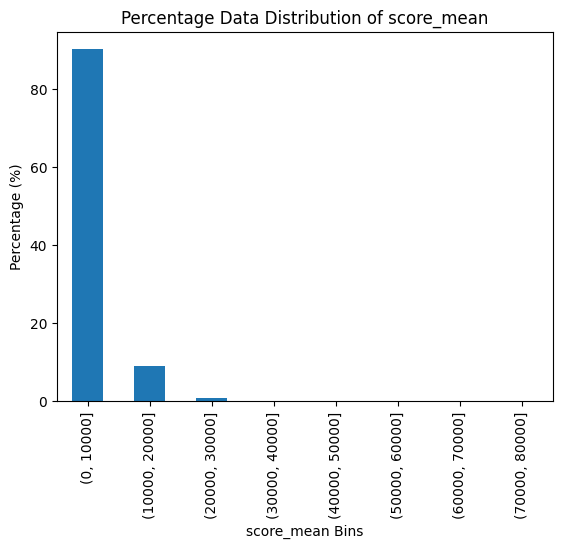

In [76]:
# Define the bins - this is an example, you'll want to adjust these based on your specific data
bins = range(int(df['score_mean'].min()), int(df['score_mean'].max()) + 10, 10000)

# Categorize the 'score_mean' data into bins
df['score_mean_bins'] = pd.cut(df['score_mean'], bins)

# Calculate the percentage of data in each bin
percentage_data = df['score_mean_bins'].value_counts(normalize=True) * 100

# Sort the bins (required if bins are not in ascending order by default)
percentage_data = percentage_data.sort_index()

# Plot the bar chart
percentage_data.plot(kind='bar')

# Set the title and labels
plt.title('Percentage Data Distribution of score_mean')
plt.xlabel('score_mean Bins')
plt.ylabel('Percentage (%)')

# Show the plot
plt.show()


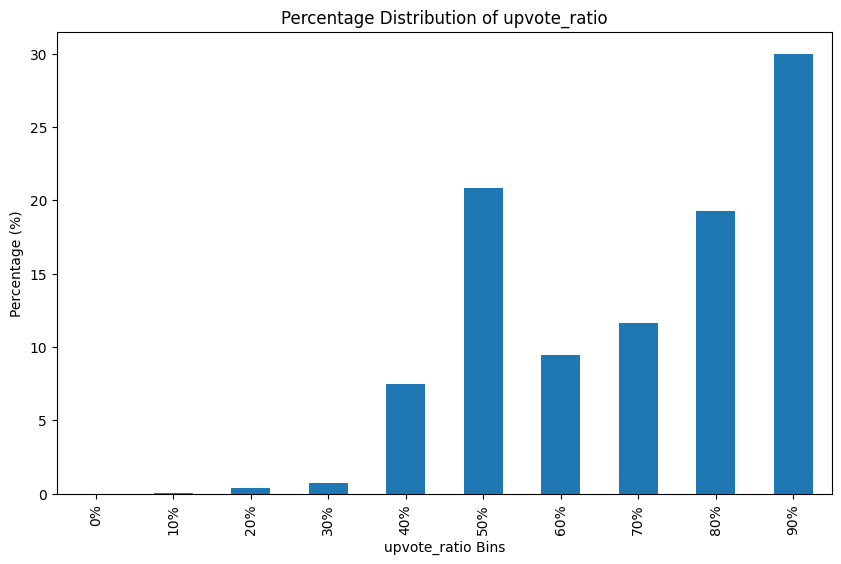

In [77]:

bins = [i/10.0 for i in range(0, 11)]  

# Categorize the 'upvote_ratio' data into bins
df['upvote_ratio_bins'] = pd.cut(df['upvote_ratio'], bins, right=False)

# Calculate the percentage of data in each bin
percentage_data = df['upvote_ratio_bins'].value_counts(normalize=True).sort_index() * 100

# Plot the bar chart
percentage_data.plot(kind='bar', figsize=(10, 6))

# Set the title and labels
plt.title('Percentage Distribution of upvote_ratio')
plt.xlabel('upvote_ratio Bins')
plt.ylabel('Percentage (%)')

# Optionally, format the x-axis labels to show them as percentages
plt.xticks(ticks=range(len(bins)-1), labels=[f"{int(b*100)}%" for b in bins[:-1]])

# Show the plot
plt.show()


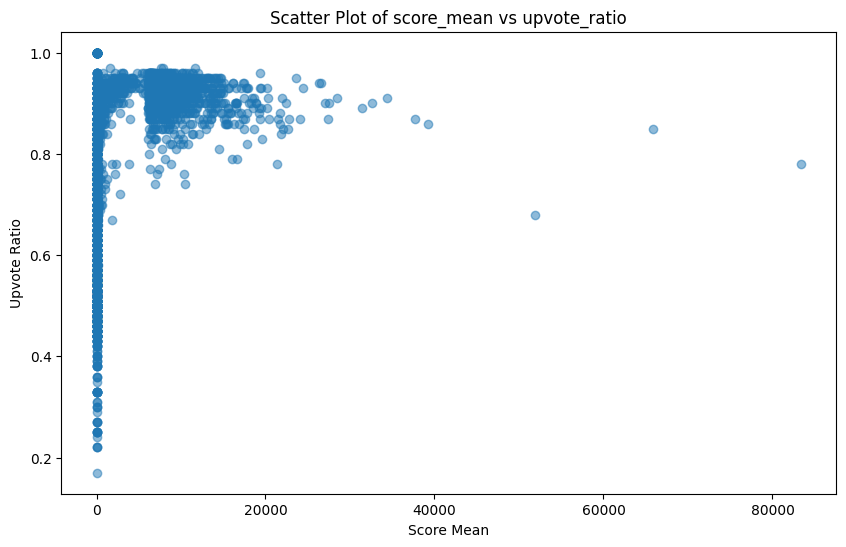

In [78]:
# Scatter plot 'score_mean' vs 'upvote_ratio'
plt.figure(figsize=(10, 6))
plt.scatter(df['score_mean'], df['upvote_ratio'], alpha=0.5)  # alpha for transparency

# Title and labels
plt.title('Scatter Plot of score_mean vs upvote_ratio')
plt.xlabel('Score Mean')
plt.ylabel('Upvote Ratio')

# Show the plot
plt.show()

In [80]:
df[['score_mean','upvote_ratio']].corr()

,score_mean,upvote_ratio
score_mean,1.000000,0.509077
upvote_ratio,0.509077,1.000000


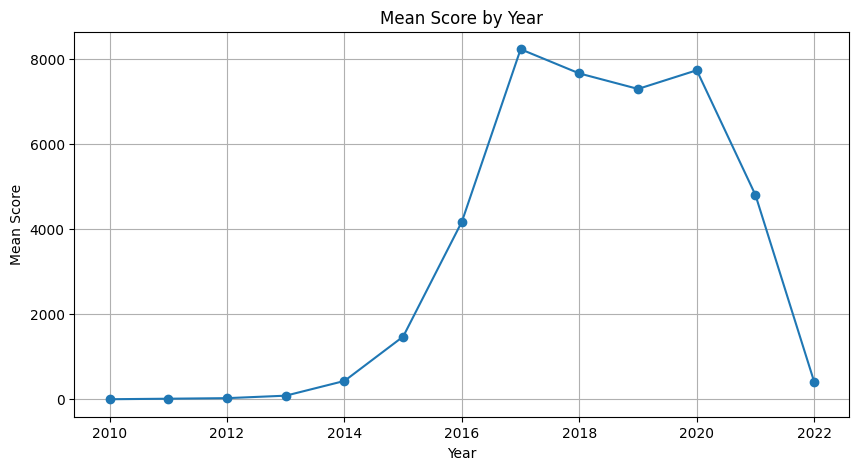

In [84]:
df['year'] = df['datetime'].dt.year
# Group by the year and calculate the mean score
score_mean_by_year = df.groupby('year')['score_mean'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(score_mean_by_year['year'], score_mean_by_year['score_mean'], marker='o')

plt.title('Mean Score by Year')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.grid(True)
plt.show()

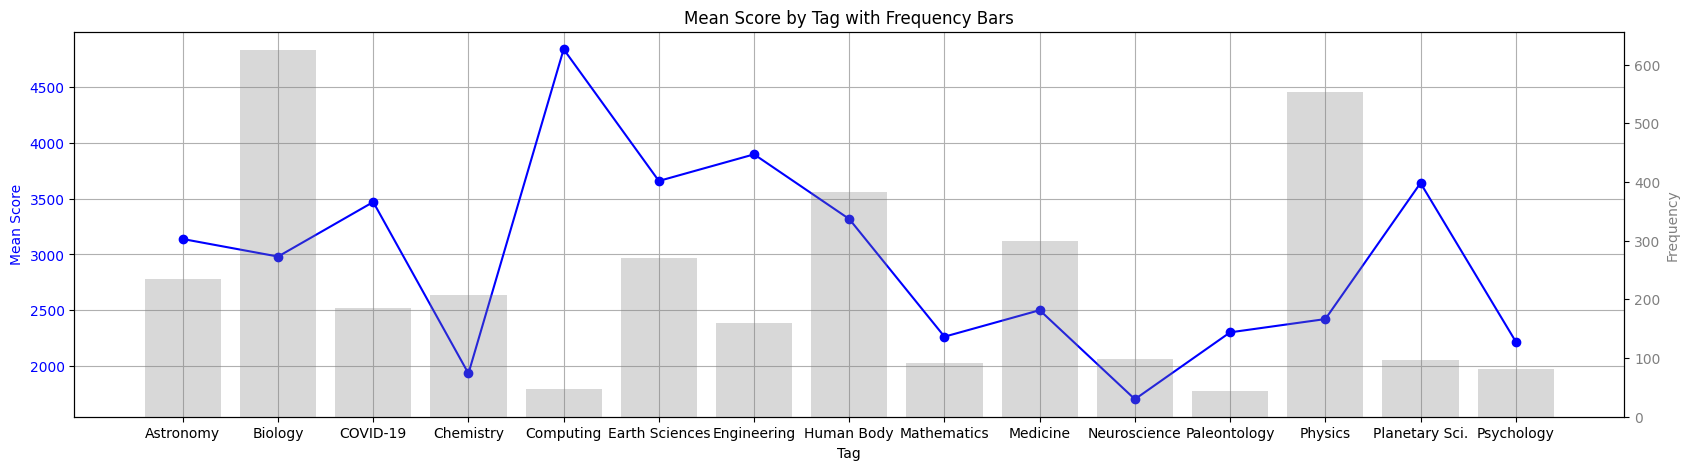

In [111]:
# Get the list of top 15 tags by frequency
list_tags = list(df.groupby('tag').count().reset_index().sort_values(by = 'title', ascending = False)['tag'][:15])
# Calculate the mean score by tag
score_mean_by_year = df[df['tag'].isin(list_tags)].groupby('tag')['score_mean'].mean().reset_index()
# Calculate the frequency of each tag
tag_frequency = df[df['tag'].isin(list_tags)].groupby('tag')['title'].count().reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.plot(score_mean_by_year['tag'], score_mean_by_year['score_mean'], marker='o', color='blue')
ax1.set_xlabel('Tag')
ax1.set_ylabel('Mean Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.bar(tag_frequency['tag'], tag_frequency['title'], alpha=0.3, color='grey')
ax2.set_ylabel('Frequency', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')
plt.title('Mean Score by Tag with Frequency Bars')
ax1.grid(True)
plt.show()

In [141]:
df['body'] = np.where(df['body'].isna(), '',df['body'])

In [145]:
df['body']= df['body'].astype(str)

### Build a model

#### divide the data into train and test

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X = df.drop(['score_mean','url','score_mean_bins','upvote_ratio_bins','year','Unnamed: 0'], axis=1)  
y = df['score_mean']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
# !pip install sentence_transformers

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from transformers import AutoTokenizer, AutoModel
import torch

from sentence_transformers import SentenceTransformer


In [151]:
# Load SBERT model and tokenizer from Hugging Face
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embedding_title = model.encode(list(X_train['title']))

In [152]:
embedding_body = model.encode(list(X_train['body']))

In [163]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from datetime import datetime

In [164]:
# Encode 'tag' using one-hot encoding
onehot_encoder = OneHotEncoder()
encoded_tags = onehot_encoder.fit_transform(X_train[['tag']]).toarray()

In [167]:
upvote_ratio_scaled = X_train[['upvote_ratio']].values

In [170]:
## Process 'datetime' by extracting year, month, and day as separate features
datetime_features = X_train['datetime'].apply(lambda x: [x.year, x.month, x.day])
datetime_features = np.array(datetime_features.tolist())  # Convert to a NumPy array
datetime_features

array([[2022,    2,    5],
       [2022,    1,   26],
       [2022,    1,   31],
       ...,
       [2022,    1,   26],
       [2022,    1,   25],
       [2017,    5,   16]])

In [171]:
X_train_features = np.concatenate(
    (embedding_title, embedding_body, encoded_tags, datetime_features, upvote_ratio_scaled), 
    axis=1
)

In [173]:
X_train_features[0].shape

(804,)

In [174]:
len(y_train)

2940

In [177]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100,  300],  # Example: Number of trees
    'max_depth': [3, 7],           # Example: Maximum number of levels in tree
    'learning_rate': [0.01,  0.1], # Example: Boosting learning rate
#     'colsample_bytree': [0.5, 0.7, 1.0], # Example: Subsample ratio of columns when constructing each tree
#     'subsample': [0.6, 0.8, 1.0]     # Example: Subsample ratio of the training instance
    # Add other parameters here if necessary
}

# Initialize XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3,
                           scoring='neg_mean_squared_error', verbose=1)

# Perform the grid search and fit the model
grid_search.fit(X_train_features, y_train)

# Print the best parameters and RMSE scores
best_score = np.sqrt(-grid_search.best_score_)
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")
print(f"Best RMSE score from Grid Search: {best_score}")

# Fitting 3 folds for each of 8 candidates, totalling 24 fits
# Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
# Best RMSE score from Grid Search: 3484.9915389534594

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best RMSE score from Grid Search: 3484.9915389534594


<Figure size 1200x800 with 0 Axes>

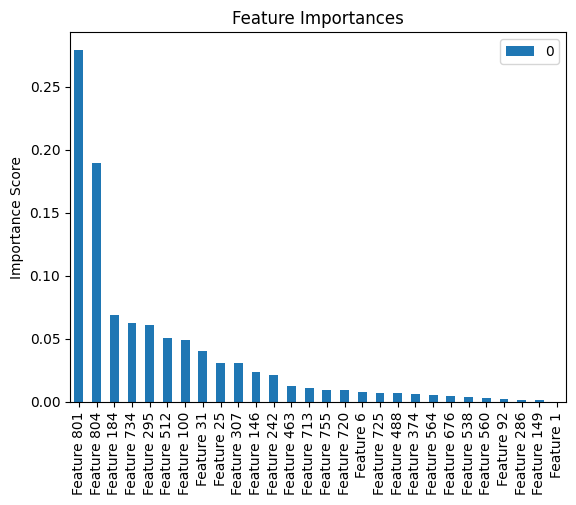

In [186]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming grid_search is your fitted GridSearchCV object from the previous example

# Retrieve the best estimator from the grid search
best_xgb_model = grid_search.best_estimator_

# Get feature importances from the model
feature_importances = best_xgb_model.feature_importances_

# If you have the feature names available:
# feature_names = ["feature1", "feature2", ..., "featureN"]
# Otherwise, you can create them as follows:
feature_names = [f'Feature {i+1}' for i in range(X_train_features.shape[1])]

# Create a pandas Series to hold the importances
importance_series = pd.Series(data=feature_importances, index=feature_names)

# Sort the features by their importance
sorted_importance = importance_series.sort_values(ascending=False)

importance = pd.DataFrame(sorted_importance)
importance = importance[importance[0]>0]

# Visualize the feature importances
plt.figure(figsize=(12, 8))
importance.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.show()



<Figure size 1200x800 with 0 Axes>

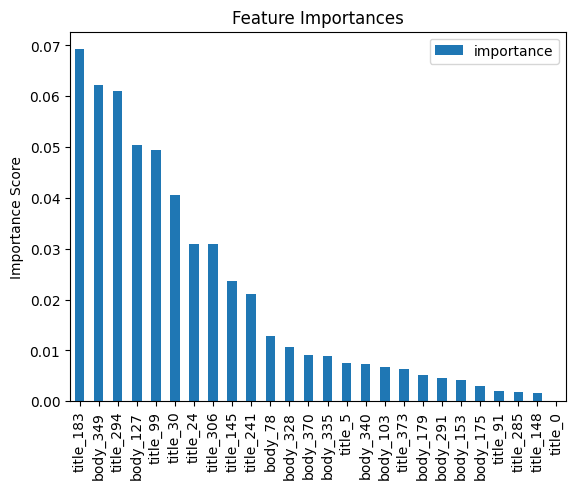

In [195]:
# Let's say you have original feature names as follows:
original_title_features = [f'title_{i}' for i in range(embedding_title.shape[1])]
original_body_features = [f'body_{i}' for i in range(embedding_body.shape[1])]
original_tag_features = ['tag_encoded']  # Assuming tag is one-hot encoded and you just have one column after encoding
original_datetime_features = ['year', 'month', 'day']
original_upvote_features = ['upvote_ratio']

# Concatenate all the feature names in the order they were concatenated to form X_train_features
all_feature_names = (original_title_features + original_body_features + original_tag_features +
                     original_datetime_features + original_upvote_features)

# Now assuming grid_search is your fitted GridSearchCV object:
best_xgb_model = grid_search.best_estimator_

# Get feature importances from the model
feature_importances = best_xgb_model.feature_importances_

# Map these importances to the correct feature names
feature_importance_dict = dict(zip(all_feature_names, feature_importances))

# Sort features by importance
sorted_importance = pd.Series(feature_importance_dict).sort_values(ascending=False)
importance = pd.DataFrame(sorted_importance)
importance = importance[importance[0]>0]
importance.columns = ['importance']
# Visualize the feature importances
plt.figure(figsize=(12, 8))
importance.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.show()



In [196]:
df

,Unnamed: 0,title,body,tag,datetime,author,score_mean,upvote_ratio,url,score_mean_bins,upvote_ratio_bins,year
0,2094,"""Pre-baking marijuana before consumption increases potency"" - Is there any actual science to this?","I'm sorry, I know this question isn't as intellectually stimulating as most of the stuff posted here, but it's relevant to my interests. I ran several searches beforehand, but while there were a lot of pot-related questions, this didn't seem to be one of them. \n\nOn this [forum ](http://buymarijuanaseeds.com/community/threads/pre-baking-marijuana.114442/)**(NSFW)**, and many others, there appears to be a school of thought that baking marijuana at relatively low temperatures - prior to smoking - activates more of the THC.\n\nThe reasoning boils down to this sentence: \n\n>In whole-plant cannabis, THC content is expressed as THCA (tetrahydrocannabolic acid) prior to decarboxylation into THC, which takes place when cannabis is heated during cooking, and smoked or vaporized ingestion. THCA is a mild analgesic and anti-inflammatory but does not have good affinity with our CB1 receptors...\n\nWhile I'm familiar with marijuana vaporization, this seems to be something different. Traditionally vaporized pot is less potent afterwards, not more. Naturally, marijuana user forums are not known for the their rigorous citation, so I can't find any evidence aside from ""I tried it and it totally worked."" I realize this question is vulnerable to all sorts of layman speculation, but I'm hoping to avoid that. \n\nIs there any scientific evidence for the statement, or is it just the usual stoner superstition?",None,2012-04-13 05:42:20,DELETED,2.0,0.53,https://www.reddit.com/r/askscience/comments/s7ubc/prebaking_marijuana_before_consumption_increases/,"(0.0, 10000.0]","[0.5, 0.6)",2012
1,2187,(Fusion/Nuclear Chem) Does tritium require less energy to fuse than deuterium?,"Alright, so here's a decent amount of questions that I've been eager to learn about but just can't find any good sources around that explain it in my basic layman terms.\n\n&#x200B;\n\nI know that deuterium requires a quite significant amount less activation energy to fuse, does tritium require even less energy than that? Are there any isotopes of any other element that take less energy to fuse than ^(1)H? \n\nI understand that we are able to create fusion reactions with specifically deuterium, but would our current technology be capable of fusing ^(1)H like stars can?",Physics,2022-02-08 22:50:51,jamx02,12.0,0.89,https://www.reddit.com/r/askscience/comments/so72zm/fusionnuclear_chem_does_tritium_require_less/,"(0.0, 10000.0]","[0.8, 0.9)",2022
2,2035,"(Geology) The ""polar wander hypothesis"" was debunked, but isn't the phenomenon of a wandering pole an actual thing since we've observed that magnetic North moves?","My textbook says\n\n>As paleomagnetists sampled and measured older and older rocks, **their results seemed to show that the north magnetic pole was far from the modern pole and appeared to wander through time**. This was called the “polar wander hypothesis” at first. But then they ran into a problem. Each continent had a completely different polar wander curve, which only converged on a common magnetic pole today. These data seemed to suggest that the magnetic field had behaved very strangely in the past, with multiple directions of magnetic north that no longer exist. As outrageous as that idea seemed, the only alternative was just as radical: **the continents had moved through time, so it was not the magnetic pole that was changing but the continents** **that recorded their directions**. But when you lined up the polar wander curves for two different continents, like Europe and North America, you found that they matched once you moved the continents back together as Wegener had suggested. **In other words, the “polar wander curves” were only apparent polar wander curves because it was the continents that moved, not the magnetic poles.**\n\nWhat I'm